In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

Sobre o conjunto de dados

Contexto

A Pegada Ecológica do Consumo mede os recursos ecológicos que uma determinada população requer para produzir os recursos naturais que consome (incluindo alimentos e produtos de fibra de origem vegetal, produtos de gado e peixe, madeira e outros produtos florestais, espaço para infraestrutura urbana) e para absorver seus resíduos, especialmente as emissões de carbono. A pegada rastreia o uso de seis categorias de superfícies produtivas: terras agrícolas, pastagens, áreas de pesca, áreas construídas (ou urbanas), áreas florestais e demanda de carbono sobre a terra.

A biocapacidade de uma nação representa a produtividade de seus recursos ecológicos, incluindo terras agrícolas, pastagens, florestas, áreas de pesca e áreas construídas. Essas áreas, especialmente se não forem colhidas, também podem absorver grande parte dos resíduos que geramos, especialmente nossas emissões de carbono.

Atributos do conjunto de dados

* Country: Nome do país.
* Region: Região Geográfica a qual o país pertence.
* SDGi: Índice de Objetivos de Desenvolvimento Sustentável.
* Life Expectancy: Média da expectativa de vida em anos.
* HDI: Índice de desenvolvimento humano, um índice composto que mede a expectativa de vida, a educação e a renda per capita.
* Per Capita GDP: Produto Interno Bruto (PIB) per capita.
* Income Group: classificação do grupo de renda (por exemplo, LI para Baixa Renda, UM para Renda Média Alta).
* Population (millions): população do país em milhões.
* Cropland Footprint: pegada ecológica das atividades agrícolas, medida em hectares globais por pessoa.
* Grazing Footprint: pegada ecológica das atividades de pastagem, medida em hectares globais por pessoa.
* Forest Product Footprint: pegada ecológica das atividades de produtos florestais, medida em hectares globais por pessoa.
* Carbon Footprint: pegada ecológica das emissões de carbono, medida em hectares globais por pessoa.
* Fish Footprint: pegada ecológica do consumo de peixes, medida em hectares globais por pessoa.
* Built-up land: pegada ecológica das áreas construídas, medida em hectares globais por pessoa.
* Total Ecological Footprint (Consumption): pegada ecológica total do consumo, medida em hectares globais por pessoa.
* Cropland: biocapacidade das terras agrícolas, medida em hectares globais por pessoa.
* Grazing land: biocapacidade das pastagens, medida em hectares globais por pessoa.
* Forest land: biocapacidade das florestas, medida em hectares globais por pessoa.
* Fishing ground: biocapacidade das áreas de pesca, medida em hectares globais por pessoa.
* Built-up land: biocapacidade das áreas construídas, medida em hectares globais por pessoa.
* Total biocapacity: biocapacidade total, medida em hectares globais por pessoa.
* Ecological (Deficit) or Reserve: a diferença entre a pegada ecológica total e a biocapacidade total, indicando se o país tem um déficit ecológico (valor negativo) ou reserva (valor positivo).
* Number of Earths required: o número de Terras que seriam necessárias se todos vivessem como a pessoa média no país.
* Number of Countries required: o número de países com a mesma biocapacidade que seriam necessários se todos vivessem como a pessoa média no país.

In [26]:


# Carregar os dados
data = pd.read_csv('Global_Ecological_Footprint_2023.csv')

#Exibir as primeiras linhas do dataframe
data.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   182 non-null    object 
 1   Region                                    182 non-null    object 
 2   SDGi                                      159 non-null    object 
 3   Life Exectancy                            176 non-null    object 
 4   HDI                                       173 non-null    object 
 5   Per Capita GDP                            165 non-null    object 
 6   Income Group                              178 non-null    object 
 7   Population (millions)                     182 non-null    object 
 8   Cropland Footprint                        152 non-null    float64
 9   Grazing Footprint                         152 non-null    float64
 10  Forest Product Footprint              

In [28]:
data.describe()

,Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,181.000000,152.000000,152.000000,152.000000,152.000000,152.000000,181.000000,181.000000,181.000000,181.000000
mean,0.582895,0.270395,0.428289,1.533553,0.146053,0.084211,2.962431,0.510526,0.402632,1.523629,0.431970,0.088023,3.556905,0.594438,1.961619,2.912770
std,0.345218,0.431513,0.565968,1.771703,0.434274,0.093572,2.194089,0.543372,0.858842,5.786458,0.907075,0.086141,10.025687,10.106659,1.453920,5.191628
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104127,-12.087339,0.366855,0.018063
25%,0.300000,0.100000,0.200000,0.300000,0.000000,0.000000,1.200000,0.200000,0.100000,0.070767,0.017074,0.038711,0.663375,-1.854753,0.807517,0.827336
50%,0.500000,0.200000,0.200000,0.900000,0.100000,0.100000,2.300000,0.300000,0.100000,0.315186,0.102650,0.065621,1.362234,-0.512739,1.536060,1.728066
75%,0.800000,0.300000,0.500000,2.200000,0.100000,0.100000,3.800000,0.600000,0.300000,1.182957,0.292881,0.110695,2.665672,0.248014,2.543898,2.733061
max,1.900000,4.700000,4.300000,11.600000,5.100000,0.500000,13.100000,2.800000,6.800000,67.949961,6.479269,0.541117,85.646110,84.099057,8.691697,55.106187


 # Análise Exploratória de Dados (EDA)

In [29]:
# Verifica valores nulos
print(data.isnull().sum())

Country                                      0
Region                                       0
SDGi                                        23
Life Exectancy                               6
HDI                                          9
Per Capita GDP                              17
Income Group                                 4
Population (millions)                        0
Cropland Footprint                          30
Grazing Footprint                           30
Forest Product Footprint                    30
Carbon Footprint                            30
Fish Footprint                              30
Built up land                               30
Total Ecological Footprint (Consumption)     1
Cropland                                    30
Grazing land                                30
Forest land                                 30
Fishing ground                              30
Built up land.1                             30
Total biocapacity                            1
Ecological (D

In [30]:
col = list(data.columns)

data['HDI'] = data['HDI'].replace(' ', np.nan)
data['HDI'] = data['HDI'].str.replace(',', '').astype(float)

data['Population (millions)'] = data['Population (millions)'].replace(' ', np.zeros)
data['Population (millions)'] = data['Population (millions)'].str.replace(',', '').astype(float)

data['Per Capita GDP'] = data['Per Capita GDP'].replace(' ', np.nan)
data['Per Capita GDP'] = data['Per Capita GDP'].str.replace('$', '')
data['Per Capita GDP'] = data['Per Capita GDP'].str.replace(',', '').astype(float)

col.remove('Country')
col.remove('Region')
col.remove('SDGi')
col.remove('Life Exectancy')
# col.remove('HDI')
# col.remove('Per Capita GDP')
col.remove('Income Group')
# col.remove('Population (millions)')

categorical_features = ['Country', 'Region', 'SDGi', 'Life Exectancy', 'Income Group']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Country Region SDGi Life Exectancy Income Group
Numerical Features : HDI Per Capita GDP Population (millions) Cropland Footprint Grazing Footprint Forest Product Footprint Carbon Footprint Fish Footprint Built up land Total Ecological Footprint (Consumption) Cropland Grazing land Forest land Fishing ground Built up land.1 Total biocapacity  Ecological (Deficit) or Reserve Number of Earths required Number of Countries required


C:\Users\jefer\AppData\Local\Temp\ipykernel_2848\324217852.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]],color = colors[0])
C:\Users\jefer\AppData\Local\Temp\ipykernel_2848\324217852.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]]

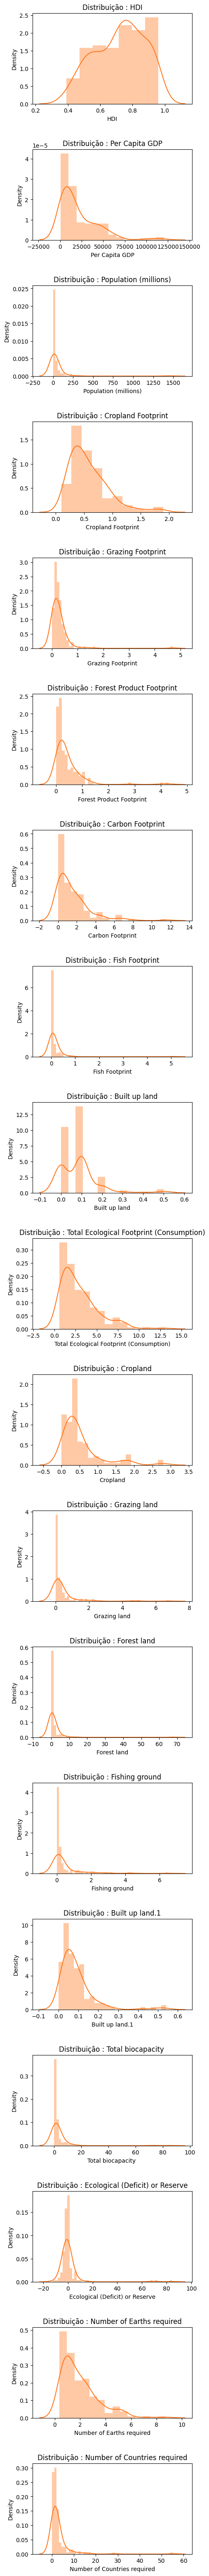

In [31]:
# Plotar a distribuição de cada variável
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 19,ncols = 1,figsize = (5, 80))
fig.subplots_adjust(hspace=0.5)

for i in range(len(numerical_features)):
    plt.subplot(19, 1, i + 1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribuição : ' + numerical_features[i]
    plt.title(title)
plt.show()

C:\Users\jefer\AppData\Local\Temp\ipykernel_2848\232593474.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=metric, data=data.sort_values(by=metric, ascending=False).iloc[idx_range], palette=colors, edgecolor='black', ax=ax)
C:\Users\jefer\AppData\Local\Temp\ipykernel_2848\232593474.py:47: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='Region', y=metric, data=data.sort_values(by=metric, ascending=False).iloc[idx_range], palette=colors, edgecolor='black', ax=ax)
C:\Users\jefer\AppData\Local\Temp\ipykernel_2848\232593474.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=metric, data=data.sort_v

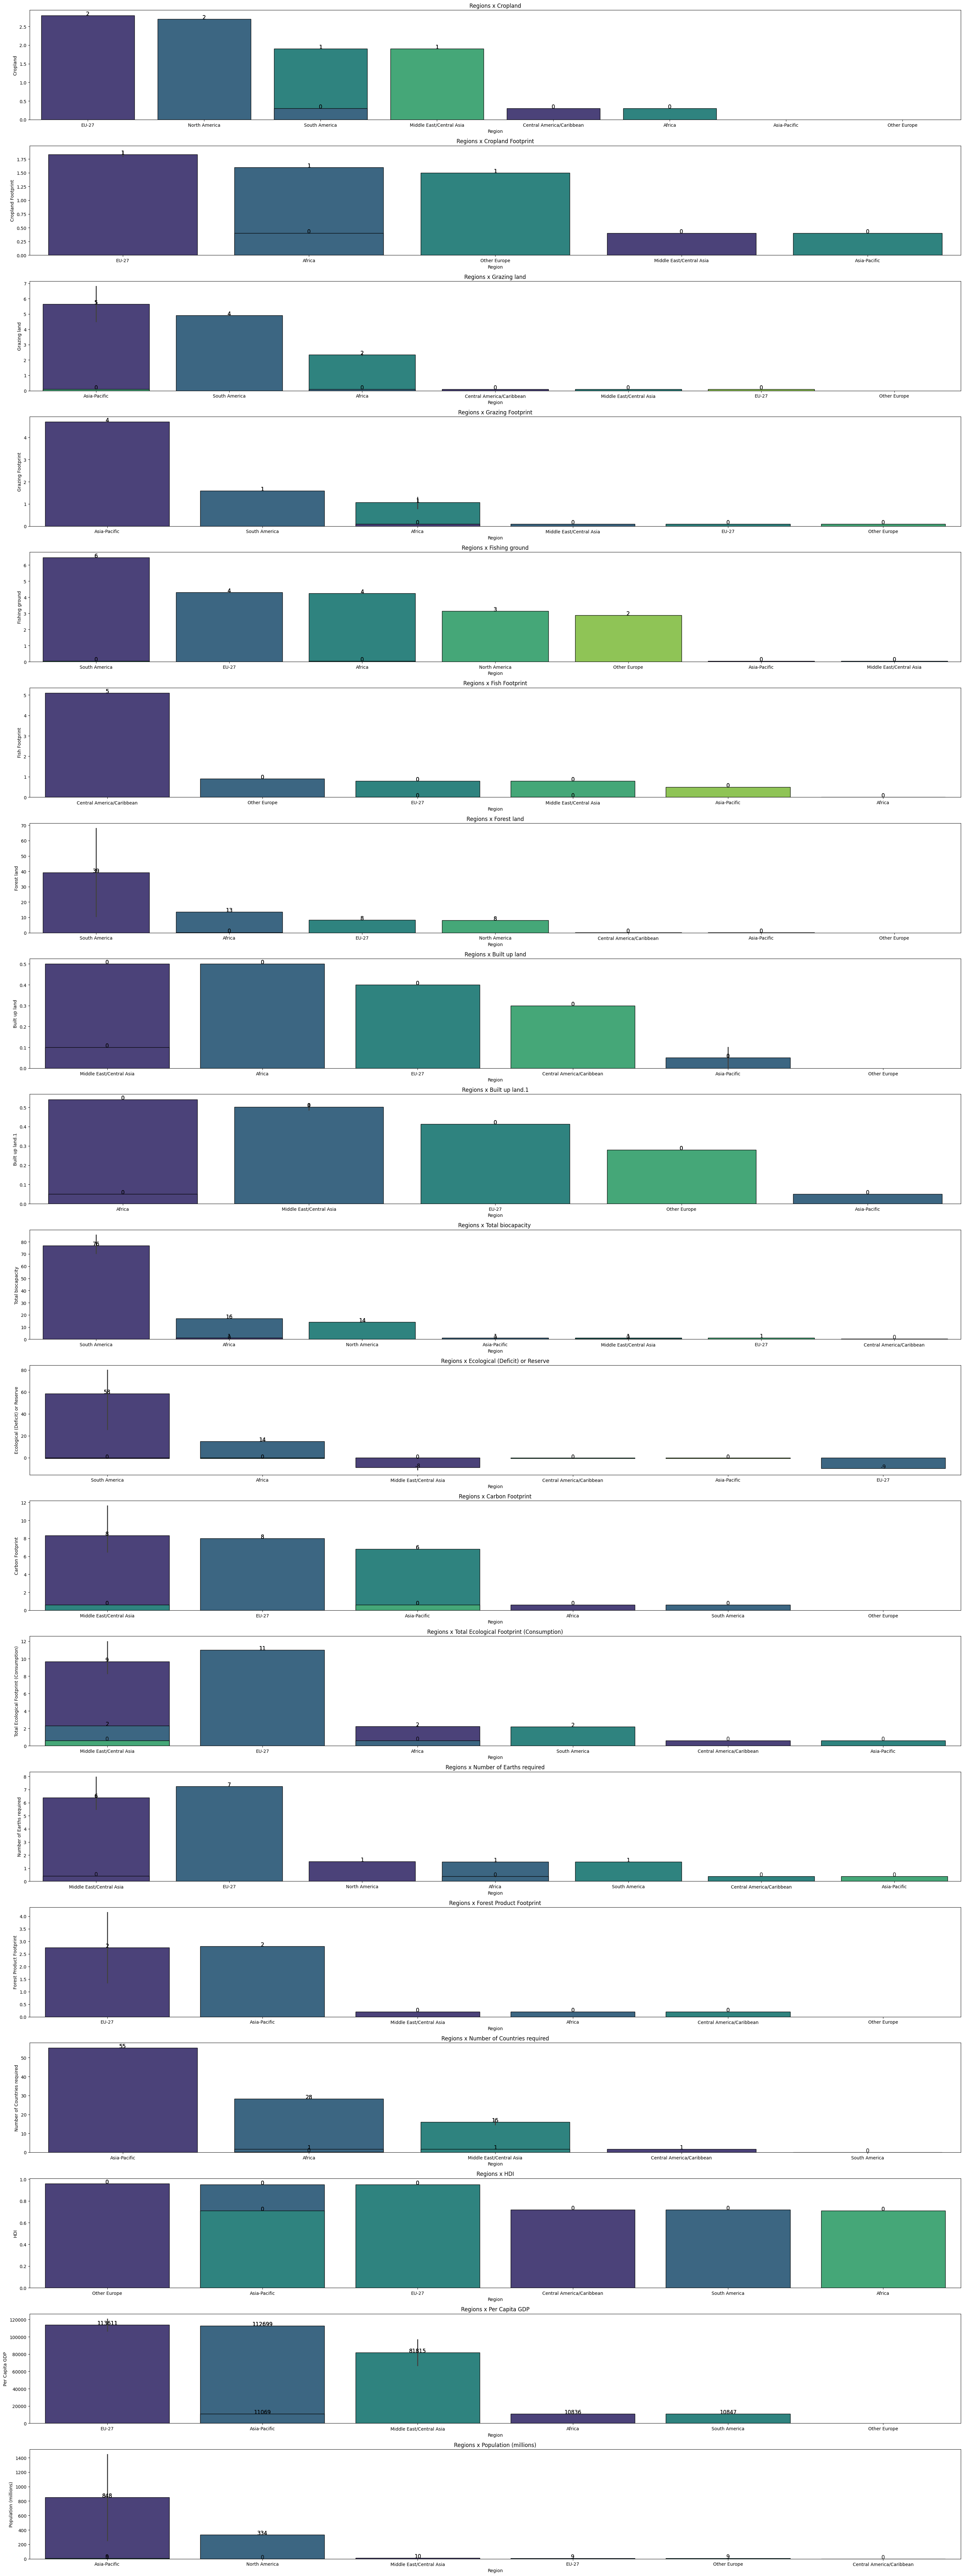

In [32]:
colors = sns.color_palette("viridis", 5)

# Lista de métricas e seus títulos correspondentes
metrics = [
    ('Cropland'),
    ('Cropland Footprint'),
    ('Grazing land'),
    ('Grazing Footprint'),
    ('Fishing ground'),
    ('Fish Footprint'),
    ('Forest land'),
    ('Built up land'),
    ('Built up land.1'),
    ('Total biocapacity '),
    ('Ecological (Deficit) or Reserve'),
    ('Carbon Footprint'),
    ('Total Ecological Footprint (Consumption)'),
    ('Number of Earths required'),
    ('Forest Product Footprint'),
    ('Number of Countries required'),
    ('HDI'),
    ('Per Capita GDP'),
    ('Population (millions)')
]

# Função para adicionar rótulos nas barras
def add_labels(ax):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), int(rect.get_height()),
                horizontalalignment='center', fontsize=12)

# Plotar todas as métricas em uma grade 8x2
fig, axes = plt.subplots(nrows=19, ncols=1, figsize=(30, 80))
axes = axes.flatten()


for i, (metric) in enumerate(metrics):
    ax = axes[i]

    # Plotar países com alta, média e baixa métrica
    for j, (title_suffix, idx_range) in enumerate([
        ('High', slice(0, 5)),
        ('Medial', slice(91, 96)),
        ('Low', slice(176, 181))
    ]):
        ax = plt.subplot(19, 1, i+1)
        sns.barplot(x='Region', y=metric, data=data.sort_values(by=metric, ascending=False).iloc[idx_range], palette=colors, edgecolor='black', ax=ax)
        plt.title(f'Regions x {metric}')
        add_labels(ax)

# Ajustar layout
plt.tight_layout()
plt.show()

# Features Numéricas

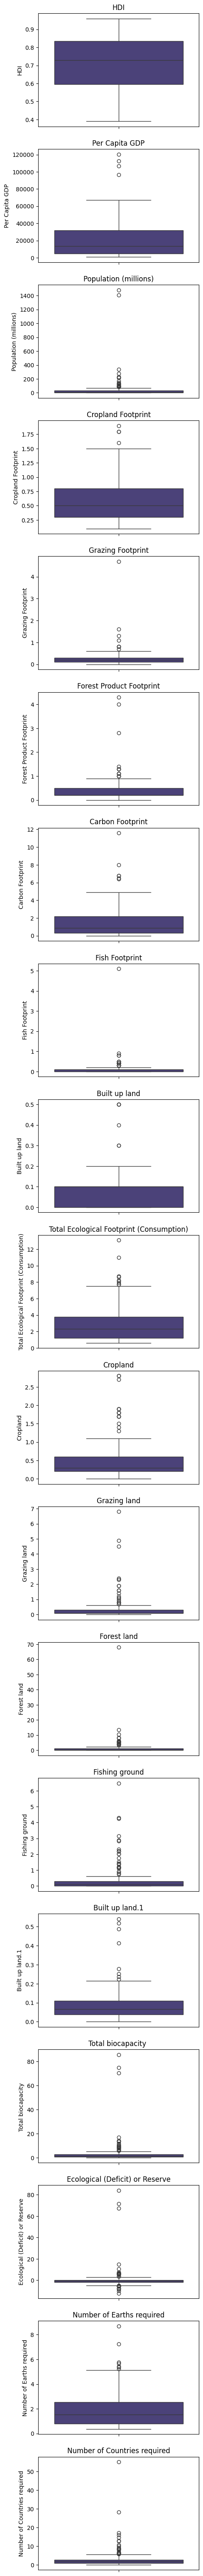

In [33]:
fig  = plt.subplots(nrows = 19,ncols = 1,figsize = (5, 80))

for i in range(len(numerical_features)):
    plt.subplot(19, 1, i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

# Resumo da EDA

* Países com alto índice de biocapacidade possuem também uma boa reserva ecológica
* Países com maiores emissões de carbono tendem a consumir mais recursos que o total disponível
* Quanto maior a pegada de carbono maior a area necessária para atender o consumo do país
* Países com maior emissão de carbono tendem a possuir umaa biocapacidade menor
* Países tendem a deixar uma maior pegada no recurso de maior abundancia

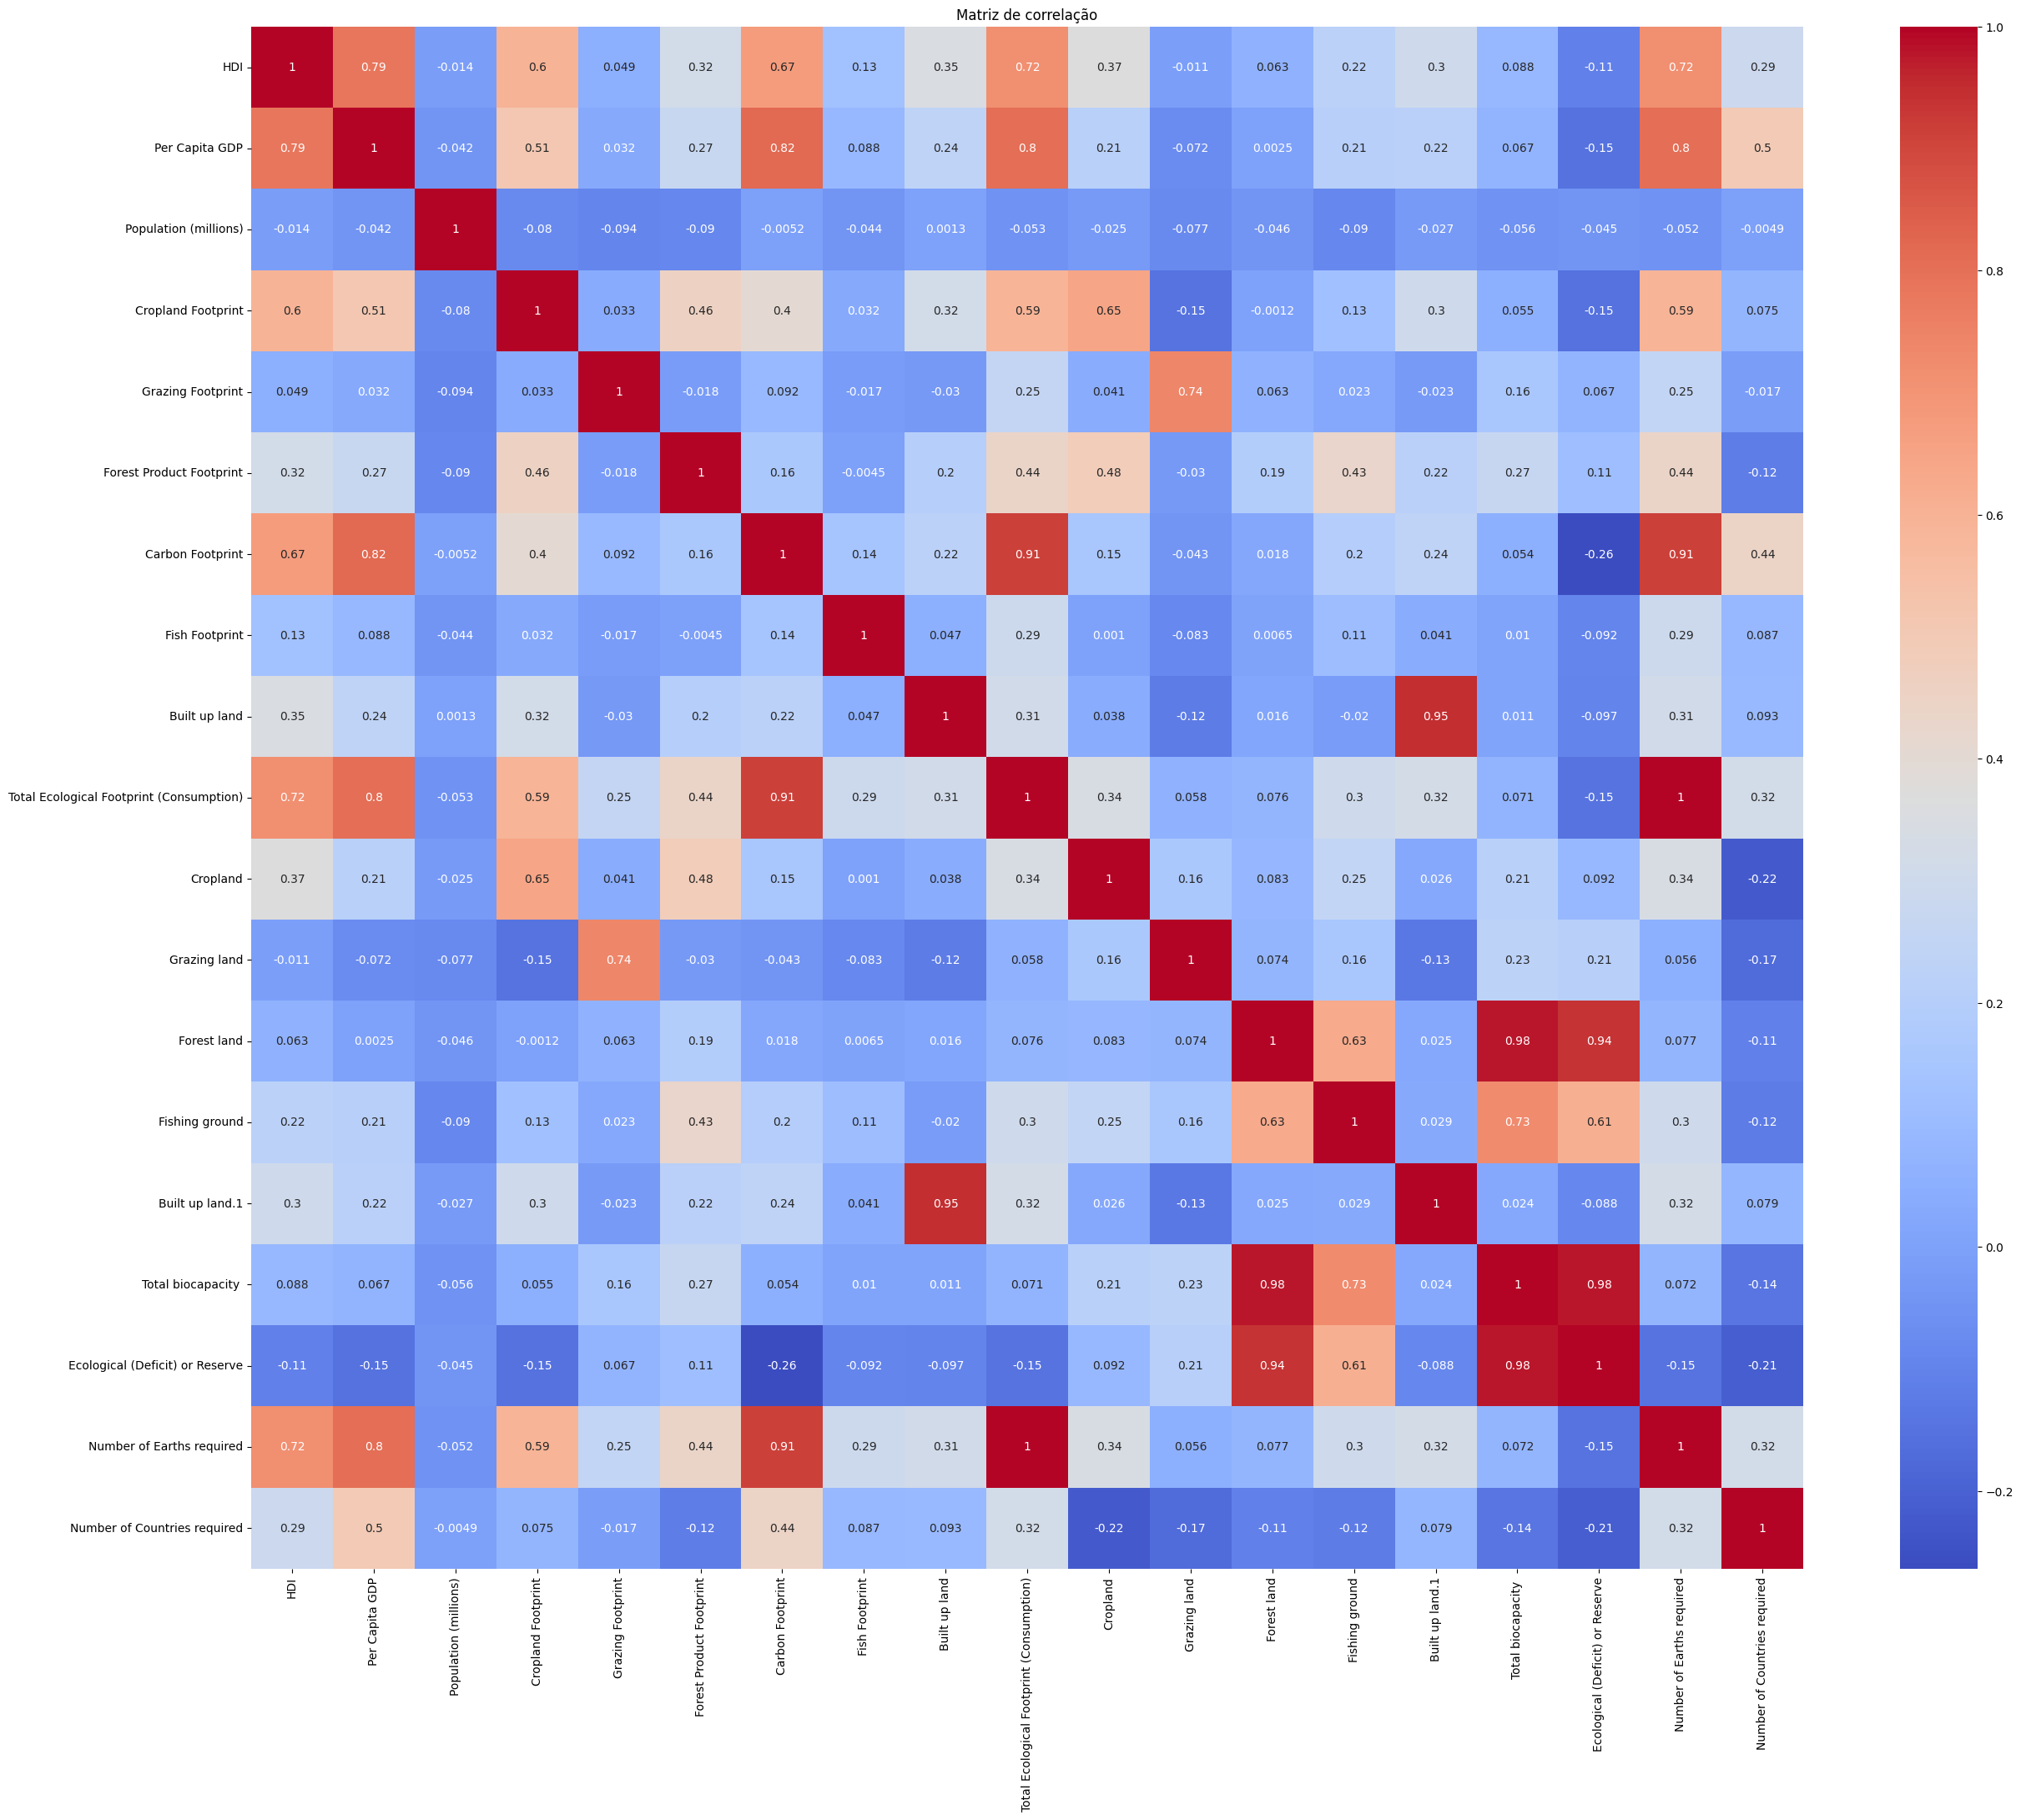

In [34]:
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (30, 24))
sns.heatmap(data[numerical_features].corr(),cmap = 'coolwarm',annot = True)
plt.title('Matriz de correlação')
plt.show()

* Quanto maior a renda per capta mais recursos são consumidos e maior é a pegada de carbono
* A área florestal influencia diretamente na biocapacidade e no déficit ecológico
* O IDH também tende a se relacionar com fatores como consumo ecológico e pegada de carbono

In [35]:
df1 = pd.DataFrame()

df1['CroplandFootprint'] = data['Cropland Footprint']
df1['GrazingFootprint'] = data['Grazing Footprint']
df1['ForestProductFootPrint'] = data['Forest Product Footprint']
df1['CarbonFootprint'] = data['Carbon Footprint']
df1['FishFootprint'] = data['Fish Footprint']
df1['HDI'] = data['HDI']
df1['TotalEcologicalFootprint'] = data['Total Ecological Footprint (Consumption)']
df1['EcologicalReserve'] = data['Ecological (Deficit) or Reserve']
df1['FrorestLand'] = data['Forest land']
df1['TotalBiocapacity'] = data['Total biocapacity ']
df1['FishingGround'] = data['Fishing ground']

df1.head()

,CroplandFootprint,GrazingFootprint,ForestProductFootPrint,CarbonFootprint,FishFootprint,HDI,TotalEcologicalFootprint,EcologicalReserve,FrorestLand,TotalBiocapacity,FishingGround
0,0.4,0.1,0.1,0.2,0.0,0.48,0.8,-0.287638,0.012981,0.513827,0.000565
1,0.8,0.2,0.2,0.7,0.0,0.80,2.1,-0.894486,0.223326,1.176752,0.081392
2,0.7,0.2,0.1,1.2,0.0,0.75,2.2,-1.559593,0.023912,0.663375,0.007179
3,0.2,0.1,0.1,0.3,0.1,0.59,0.9,0.730346,0.416888,1.588191,0.153499
4,NaN,NaN,NaN,NaN,NaN,0.79,2.9,-2.019458,NaN,0.917277,NaN


# Pré-processamento dos dados

In [36]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['CroplandFootprint'] = mms.fit_transform(df1[['CroplandFootprint']])
df1['GrazingFootprint'] = mms.fit_transform(df1[['GrazingFootprint']])
df1['ForestProductFootPrint'] = mms.fit_transform(df1[['ForestProductFootPrint']])
df1['CarbonFootprint'] = mms.fit_transform(df1[['CarbonFootprint']])
df1['FishFootprint'] = mms.fit_transform(df1[['FishFootprint']])
df1['HDI'] = mms.fit_transform(df1[['HDI']])
df1['TotalEcologicalFootprint'] = mms.fit_transform(df1[['TotalEcologicalFootprint']])
df1['EcologicalReserve'] = mms.fit_transform(df1[['EcologicalReserve']])
df1['FrorestLand'] = mms.fit_transform(df1[['FrorestLand']])
df1['TotalBiocapacity'] = mms.fit_transform(df1[['TotalBiocapacity']])
df1['FishingGround'] = mms.fit_transform(df1[['FishingGround']])

# df1['CroplandFootprint'].fillna(df1['CroplandFootprint'].mode(), inplace=True)
# df1['GrazingFootprint'].fillna(df1['GrazingFootprint'].mode(), inplace=True)
# df1['ForestProductFootPrint'].fillna(df1['ForestProductFootPrint'].mode(), inplace=True)
# df1['CarbonFootprint'].fillna(df1['CarbonFootprint'].mode(), inplace=True)
# df1['FishFootprint'].fillna(df1['FishFootprint'].mode(), inplace=True)
# df1['HDI'].fillna(df1['HDI'].mode(), inplace=True)
# df1['TotalEcologicalFootprint'].fillna(df1['TotalEcologicalFootprint'].mode(), inplace=True)
# df1['EcologicalReserve'].fillna(df1['EcologicalReserve'].mode(), inplace=True)
# df1['FrorestLand'].fillna(df1['FrorestLand'].mode(), inplace=True)
# df1['TotalBiocapacity'].fillna(df1['TotalBiocapacity'].mode(), inplace=True)
# df1['FishingGround'].fillna(df1['FishingGround'].mode(), inplace=True)

for column in df1.columns:
    mode = df1[column].mode()[0]  # Calcular a moda da coluna
    df1[column].fillna(mode, inplace=True)  # Substituir os valores NaN pela moda

df1.insert(loc = 0, value = list(data['Region']), column = 'Region')

print(df1.isnull().sum())

df1.head()

Region                      0
CroplandFootprint           0
GrazingFootprint            0
ForestProductFootPrint      0
CarbonFootprint             0
FishFootprint               0
HDI                         0
TotalEcologicalFootprint    0
EcologicalReserve           0
FrorestLand                 0
TotalBiocapacity            0
FishingGround               0
dtype: int64


C:\Users\jefer\AppData\Local\Temp\ipykernel_2848\1149953816.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(mode, inplace=True)  # Substituir os valores NaN pela moda


,Region,CroplandFootprint,GrazingFootprint,ForestProductFootPrint,CarbonFootprint,FishFootprint,HDI,TotalEcologicalFootprint,EcologicalReserve,FrorestLand,TotalBiocapacity,FishingGround
0,Middle East/Central Asia,0.166667,0.021277,0.023256,0.017241,0.000000,0.157895,0.016,0.122675,0.000191,0.004789,0.000087
1,Other Europe,0.388889,0.042553,0.046512,0.060345,0.000000,0.719298,0.120,0.116366,0.003287,0.012539,0.012562
2,Africa,0.333333,0.042553,0.023256,0.103448,0.000000,0.631579,0.128,0.109451,0.000352,0.006538,0.001108
3,Africa,0.055556,0.021277,0.023256,0.025862,0.019608,0.350877,0.024,0.133259,0.006135,0.017349,0.023691
4,Central America/Caribbean,0.111111,0.021277,0.046512,0.008621,0.000000,0.701754,0.184,0.104671,0.000000,0.009506,0.000000


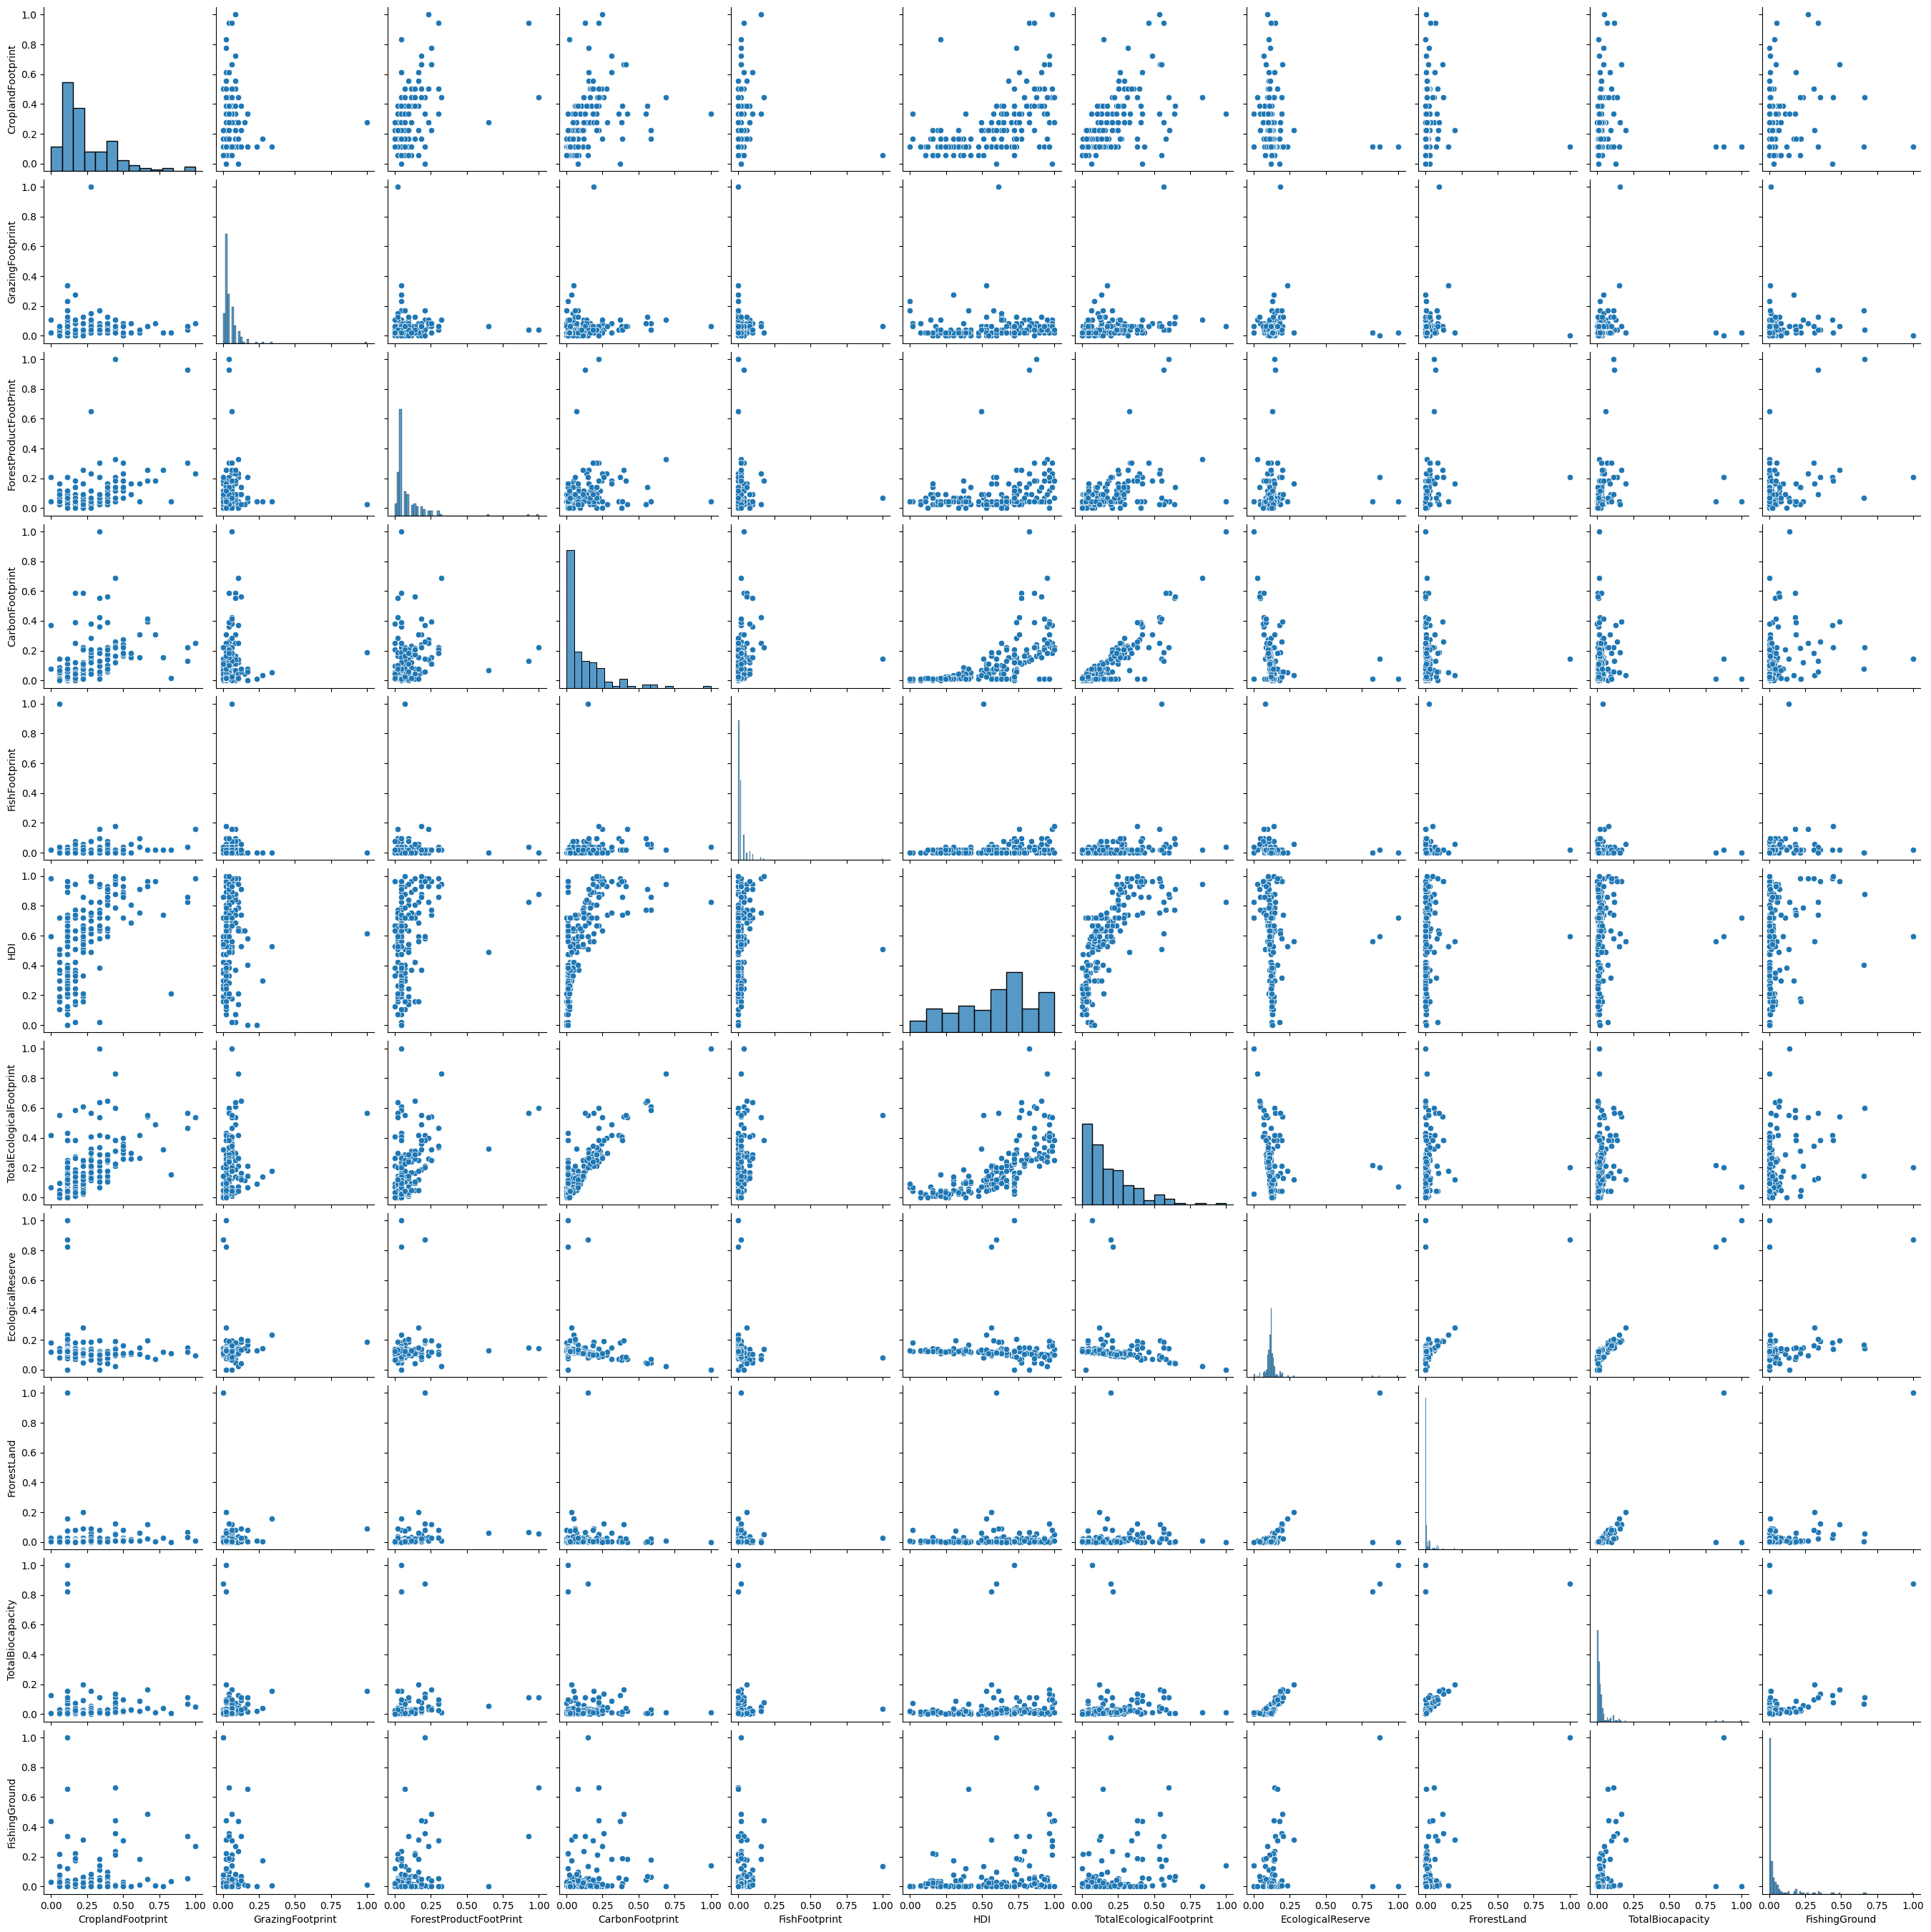

In [37]:
sns.pairplot(df1)
plt.show()

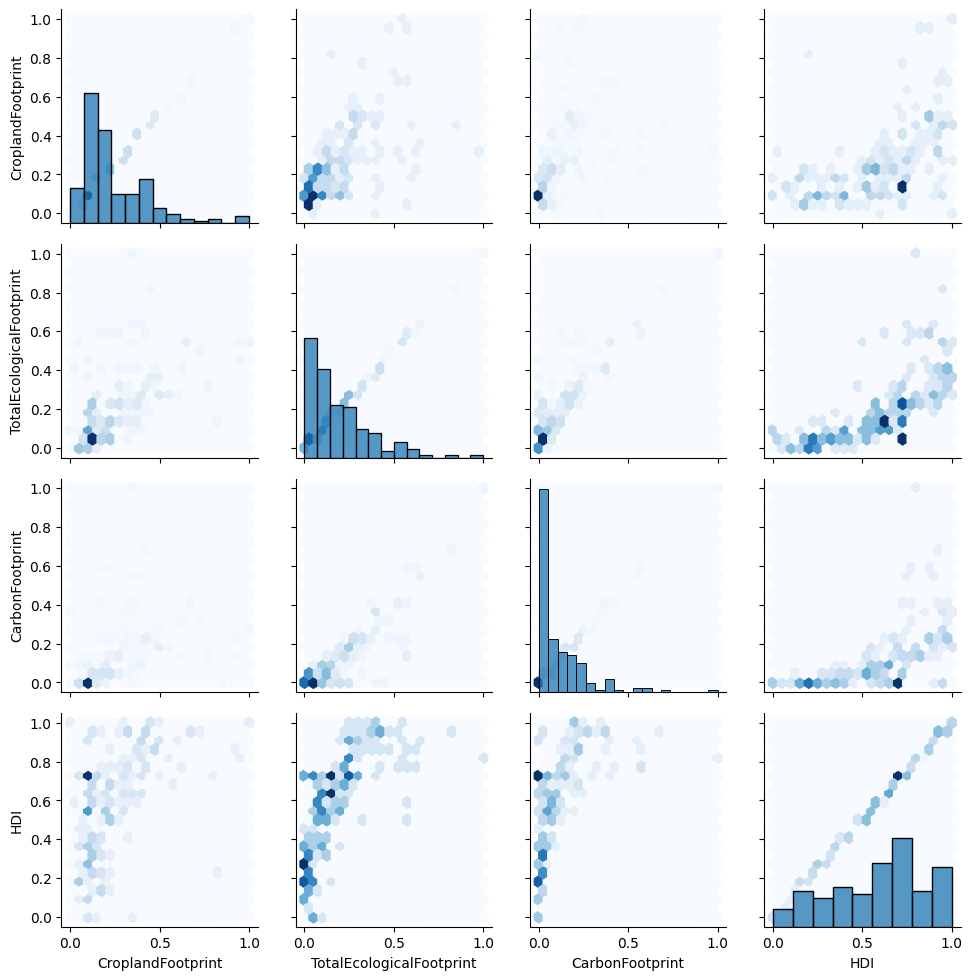

In [38]:

data_filter = pd.DataFrame()
data_filter = df1[['CroplandFootprint','TotalEcologicalFootprint', 'CarbonFootprint', 'HDI']]

def hexbin(x, y, **kwargs):
    plt.hexbin(x, y, gridsize=20, cmap='Blues')

g = sns.PairGrid(data_filter)
g.map(hexbin)
g.map_diag(sns.histplot, kde=False)

plt.show()

In [39]:
sf_data = StandardScaler()
data_scaled = sf_data.fit_transform(data_filter.astype(float))

# Implementação dos Algoritmos de Clusterização

In [40]:
# Calcular os centróides dos clusters
def calculate_centroids(X, labels):
    centroids = []
    for i in np.unique(labels):
        centroids.append(X[labels == i].mean(axis=0))
    return np.array(centroids)

# Calcular o SSE
def calculate_sse(X, labels):
    centroids = calculate_centroids(X, labels)

    sse = 0
    for i in np.unique(labels):
        cluster_points = X[labels == i]
        centroid = centroids[i]
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

# K-Means

### Pseudocodigo

```
Selecione K objetos como centróides
Repita
    Forme K grupos associando cada objeto ao seu centróide mais próximo
    Recalcule os centróides de cada grupo
Até que Convergência seja obtida    
```
Fonte: Introduction to Data Mining Pang-Ning Tan - Algorithm 8.1 Basic K-means algorithm.

Silhouette Score para K-Means: 0.37490064449947647
Davies-Bouldin Score para K-Means: 0.9070665567579196
SSE K-Means: 271.30655066002157
Total elementos por grupo: {0: 79, 1: 48, 2: 55}


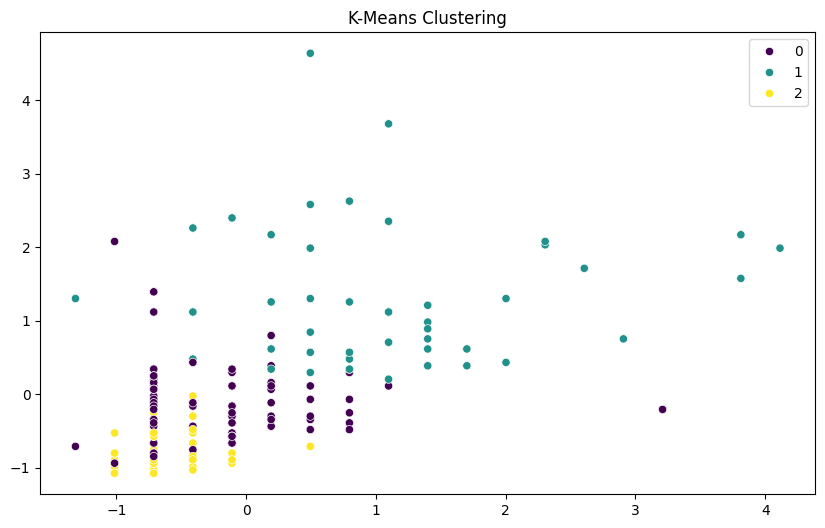

In [41]:

# Aplicar o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
sse_kmeans = calculate_sse(data_scaled, kmeans_labels)
# rand_index = adjusted_rand_score(true_labels, kmeans_labels)

print(f'Silhouette Score para K-Means: {silhouette_kmeans}')
print(f'Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}')
print(f'SSE K-Means: {sse_kmeans}')
# print(f'RandIndex K-Means: {rand_index}')

unique_labels, counts = np.unique(kmeans_labels, return_counts=True)

results = dict(zip(unique_labels, counts))
print(f'Total elementos por grupo: {results}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Aglomerative Clustering

### Pseudocodigo
```
Calcule a matrix de proximidade se necessário
Repita
    Una os dois clusters mais próximos
    Atualize a matrix de proximidade para refletir a proximidade entre o novo cluster gerado e os clusters originais
Até Apenas um cluster existir
```
Fonte: Introduction to Data Mining Pang-Ning Tan - Algorithm 8.3 Basic agglomerative hierarchical clustering algorithm

Silhouette Score para Aglomerative Clustering: 0.3662737602550187
Davies-Bouldin Score para Aglomerative Clustering: 0.9185470966466519
SSE Aglomerative Clustering: 279.17065004609003
Total elementos por grupo: {0: 54, 1: 73, 2: 55}


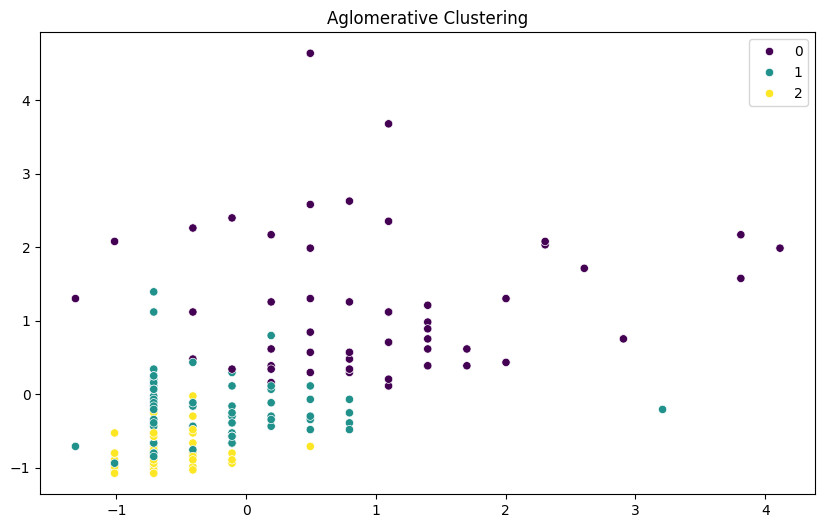

In [42]:
# Aplicar o Aglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_agg = silhouette_score(data_scaled, agg_labels)
davies_bouldin_agg = davies_bouldin_score(data_scaled, agg_labels)
sse_agg = calculate_sse(data_scaled, agg_labels)

print(f'Silhouette Score para Aglomerative Clustering: {silhouette_agg}')
print(f'Davies-Bouldin Score para Aglomerative Clustering: {davies_bouldin_agg}')
print(f'SSE Aglomerative Clustering: {sse_agg}')

unique_labels, counts = np.unique(agg_labels, return_counts=True)

results = dict(zip(unique_labels, counts))
print(f'Total elementos por grupo: {results}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agg_labels, palette='viridis')
plt.title('Aglomerative Clustering')
plt.show()

# Meanshift

Silhouette Score para MeanShift: 0.4795638566234021
Davies-Bouldin Score para MeanShift: 0.7268416993496594
SSE MeanShift: 443.440062438299
Total elementos por grupo: {0: 166, 1: 10, 2: 6}


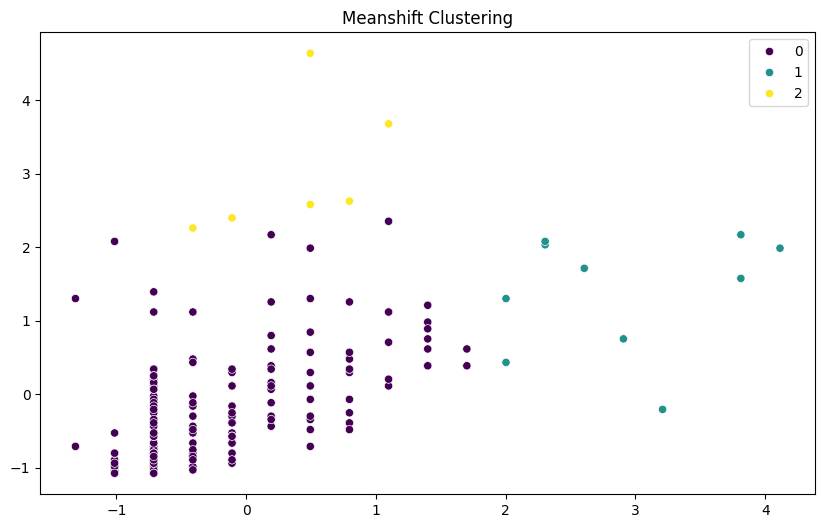

In [43]:
# Aplicar MeanShift
meanshift = MeanShift(bandwidth=2)
meanshift_labels = meanshift.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_meanshift = silhouette_score(data_scaled, meanshift_labels)
davies_bouldin_meanshift = davies_bouldin_score(data_scaled, meanshift_labels)
sse_meanshift = calculate_sse(data_scaled, meanshift_labels)

print(f'Silhouette Score para MeanShift: {silhouette_meanshift}')
print(f'Davies-Bouldin Score para MeanShift: {davies_bouldin_meanshift}')
print(f'SSE MeanShift: {sse_meanshift}')

unique_labels, counts = np.unique(meanshift_labels, return_counts=True)

results = dict(zip(unique_labels, counts))
print(f'Total elementos por grupo: {results}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=meanshift_labels, palette='viridis')
plt.title('Meanshift Clustering')
plt.show()

In [44]:
# Comparação dos Resultados
results = pd.DataFrame({
    'Algoritmo': ['K-Means', 'Aglomerative Clustering', 'Meanshift'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agg, silhouette_meanshift],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_agg, davies_bouldin_meanshift],
    'SSE Score': [sse_kmeans, sse_agg, sse_meanshift]
})

print(results)

                 Algoritmo  Silhouette Score  Davies-Bouldin Score   SSE Score
0                  K-Means          0.374901              0.907067  271.306551
1  Aglomerative Clustering          0.366274              0.918547  279.170650
2                Meanshift          0.479564              0.726842  443.440062


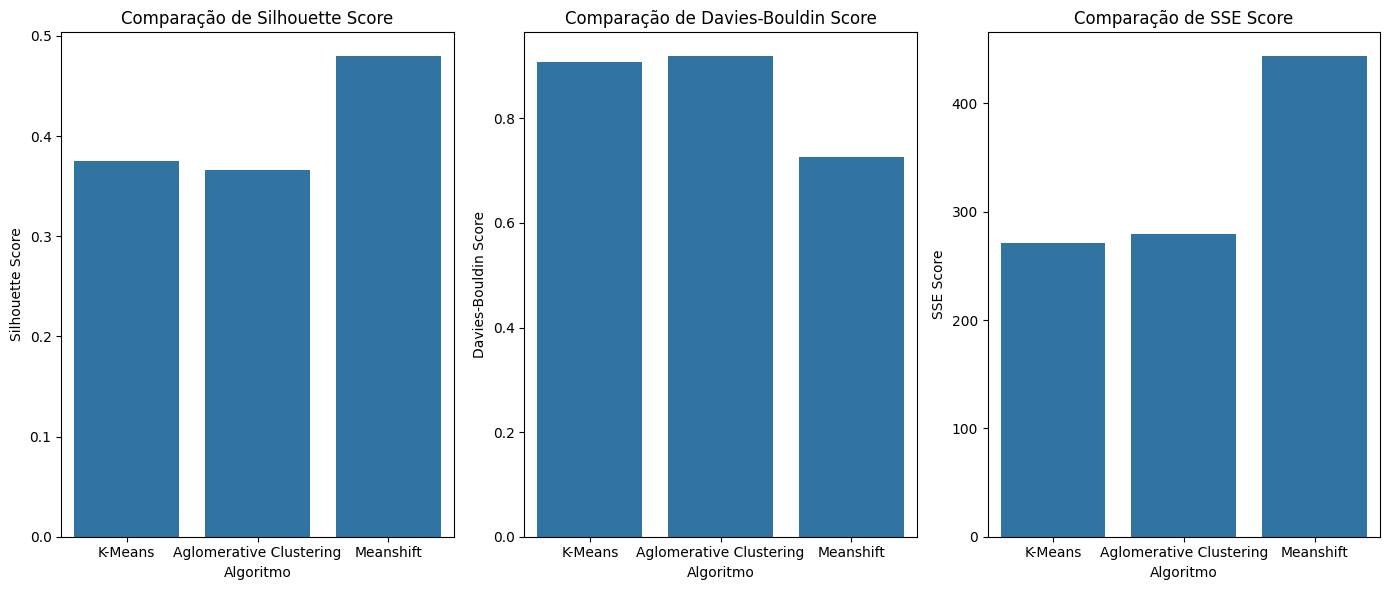

In [45]:
# Plotar as métricas de avaliação
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Plotar Silhouette Score
sns.barplot(x='Algoritmo', y='Silhouette Score', data=results, ax=ax[0])
ax[0].set_title('Comparação de Silhouette Score')

# Plotar Davies-Bouldin Score
sns.barplot(x='Algoritmo', y='Davies-Bouldin Score', data=results, ax=ax[1])
ax[1].set_title('Comparação de Davies-Bouldin Score')

# Plotar SSE
sns.barplot(x='Algoritmo', y='SSE Score', data=results, ax=ax[2])
ax[2].set_title('Comparação de SSE Score')


plt.tight_layout()
plt.show()

In [46]:
# Determinar o melhor algoritmo com base nas métricas
best_silhouette = results.loc[results['Silhouette Score'].idxmax()]
best_davies_bouldin = results.loc[results['Davies-Bouldin Score'].idxmin()]
best_sse = results.loc[results['SSE Score'].idxmin()]

print(f"Melhor Algoritmo com base no Silhouette Score: {best_silhouette['Algoritmo']} com Silhouette Score de {best_silhouette['Silhouette Score']}")
print(f"Melhor Algoritmo com base no Davies-Bouldin Score: {best_davies_bouldin['Algoritmo']} com Davies-Bouldin Score de {best_davies_bouldin['Davies-Bouldin Score']}")
print(f"Melhor Algoritmo com base no SSE Score: {best_sse['Algoritmo']} com SSE Score de {best_sse['SSE Score']}")

Melhor Algoritmo com base no Silhouette Score: Meanshift com Silhouette Score de 0.4795638566234021
Melhor Algoritmo com base no Davies-Bouldin Score: Meanshift com Davies-Bouldin Score de 0.7268416993496594
Melhor Algoritmo com base no SSE Score: K-Means com SSE Score de 271.30655066002157
